# Decision Tree

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn import tree
from sklearn.tree import plot_tree

# !pip install graphviz
import graphviz
from sklearn.metrics import classification_report



### Decision Tree Representation

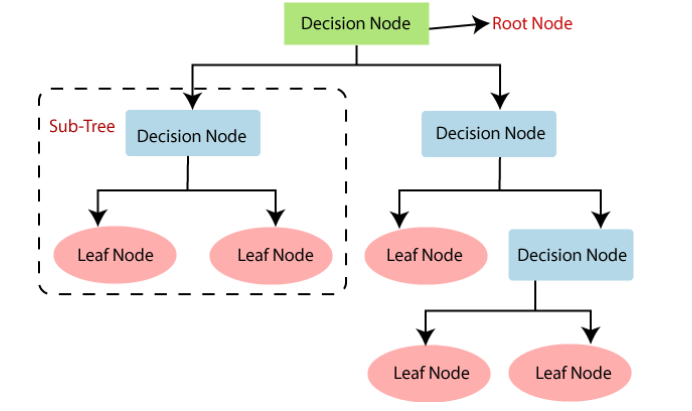

__Root Node__: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.<br>
__Leaf Node__: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.<br>
__Splitting__: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.<br>
__Branch/Sub Tree__: A tree formed by splitting the tree.<br>
__Pruning__: Pruning is the process of removing the unwanted branches from the tree.<br>
__Parent/Child node__: The root node of the tree is called the parent node, and other nodes are called the child nodes.

While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are: 

__Information Gain<br>
Gini Index__

__Information gain__ is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class. According to the value of information gain, we split the node and build the decision tree. A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:<br>

Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)<br>

__Entropy__: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:
<br>
Entropy(s) = -P(yes)log2 P(yes)- P(no) log2 P(no)<br>

Where,

S = Total number of samples<br>
P(yes) = probability of yes<br>
P(no)= probability of no<br>


__Gini index__ is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.<br>
An attribute with the low Gini index should be preferred as compared to the high Gini index.
It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
Gini index can be calculated using the below formula:<br>
Gini Index= 1- ∑jPj2

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. There are mainly two types of tree pruning technology used:

__Cost Complexity Pruning<br>
Reduced Error Pruning__

In [83]:
data=pd.read_csv("Social_Network_Ads.csv")

In [77]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.shape

(400, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [10]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot:>

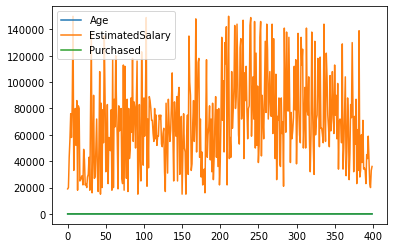

In [11]:
data.plot()

<AxesSubplot:xlabel='Purchased', ylabel='Density'>

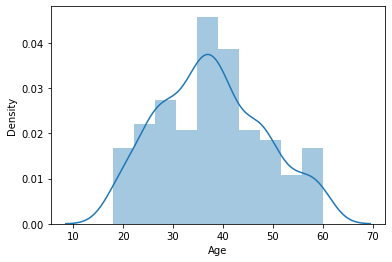

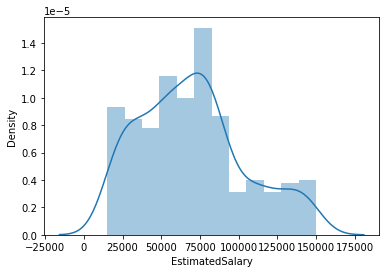

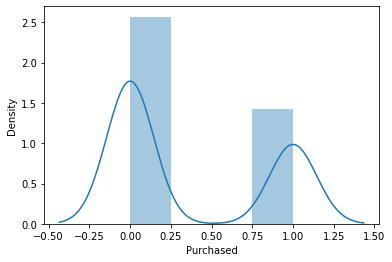

In [27]:

plt.subplots(1,1)
sns.distplot(data.Age)

plt.subplots(1,1)
sns.distplot(data.EstimatedSalary)

plt.subplots(1,1)
sns.distplot(data.Purchased)


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

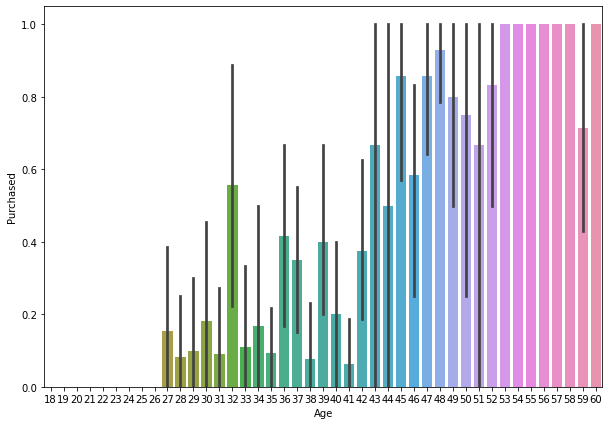

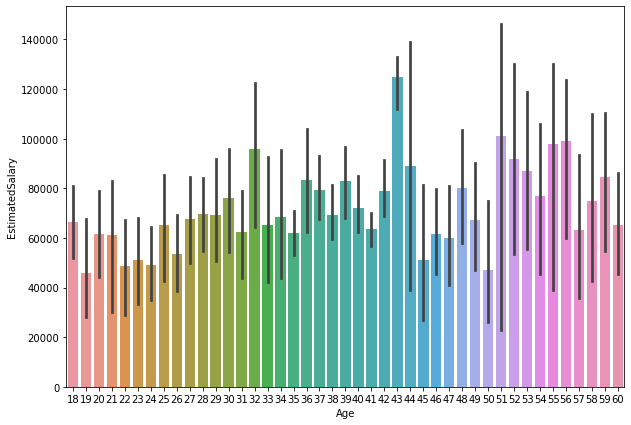

In [43]:

plt.figure(figsize=(10,7))
sns.barplot(x = 'Age',y = 'Purchased',data = data)
plt.figure(figsize=(10,7))
sns.barplot(x = 'Age',y = 'EstimatedSalary',data = data)

In [45]:
pd.set_option('display.max_rows', 500)
print(data.groupby(['Age','Purchased'])['Age'].count())
print(data.groupby(['Age','EstimatedSalary'])['Age'].count())

Age  Purchased
18   0             5
19   0             7
20   0             7
21   0             4
22   0             5
23   0             6
24   0             9
25   0             6
26   0            16
27   0            11
     1             2
28   0            11
     1             1
29   0             9
     1             1
30   0             9
     1             2
31   0            10
     1             1
32   0             4
     1             5
33   0             8
     1             1
34   0             5
     1             1
35   0            29
     1             3
36   0             7
     1             5
37   0            13
     1             7
38   0            12
     1             1
39   0             9
     1             6
40   0            12
     1             3
41   0            15
     1             1
42   0            10
     1             6
43   0             1
     1             2
44   0             1
     1             1
45   0             1
     1             

In [54]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

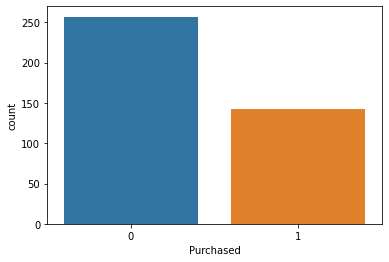

In [48]:
sns.countplot(data.Purchased)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

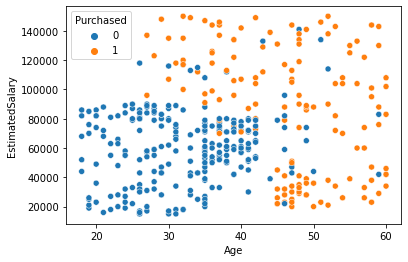

In [78]:
sns.scatterplot('Age','EstimatedSalary',hue='Purchased',data=data)

In [89]:
X=data.loc[:,data.columns!='Purchased']
y=data.loc[:,'Purchased']

In [90]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [91]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Splitting data And model building

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.91
0.94


In [123]:
scores = cross_val_score(classifier, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.89


In [120]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 1)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9166666666666666
0.94


In [111]:
y_pred_test=classifier.predict(X_test)
print(y_pred_test)
y_pred_train=classifier.predict(X_train)
print(y_pred_train)


[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
[0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [122]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[64  4]
 [ 2 30]]


In [113]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [114]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9166666666666666
0.94


### Decision tree plot

[Text(334.8, 380.52, 'X[0] <= 0.631\ngini = 0.466\nsamples = 300\nvalue = [189, 111]'),
 Text(167.4, 271.8, 'X[1] <= 0.606\ngini = 0.303\nsamples = 215\nvalue = [175, 40]'),
 Text(83.7, 163.07999999999998, 'X[0] <= -0.161\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(41.85, 54.360000000000014, 'gini = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= -1.151\ngini = 0.26\nsamples = 39\nvalue = [6, 33]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 54.360000000000014, 'gini = 0.229\nsamples = 38\nvalue = [5, 33]'),
 Text(502.20000000000005, 271.8, 'X[0] <= 0.829\ngini = 0.275\nsamples = 85\nvalue = [14, 71]'),
 Text(418.5, 163.07999999999998, 'X[1] <= -0.51\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 

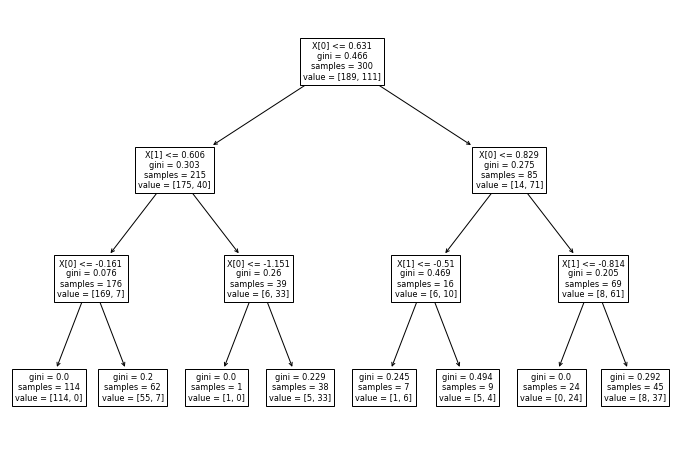

In [115]:
plt.figure(figsize=(12,8))

tree.plot_tree(classifier.fit(X_train, y_train)) 

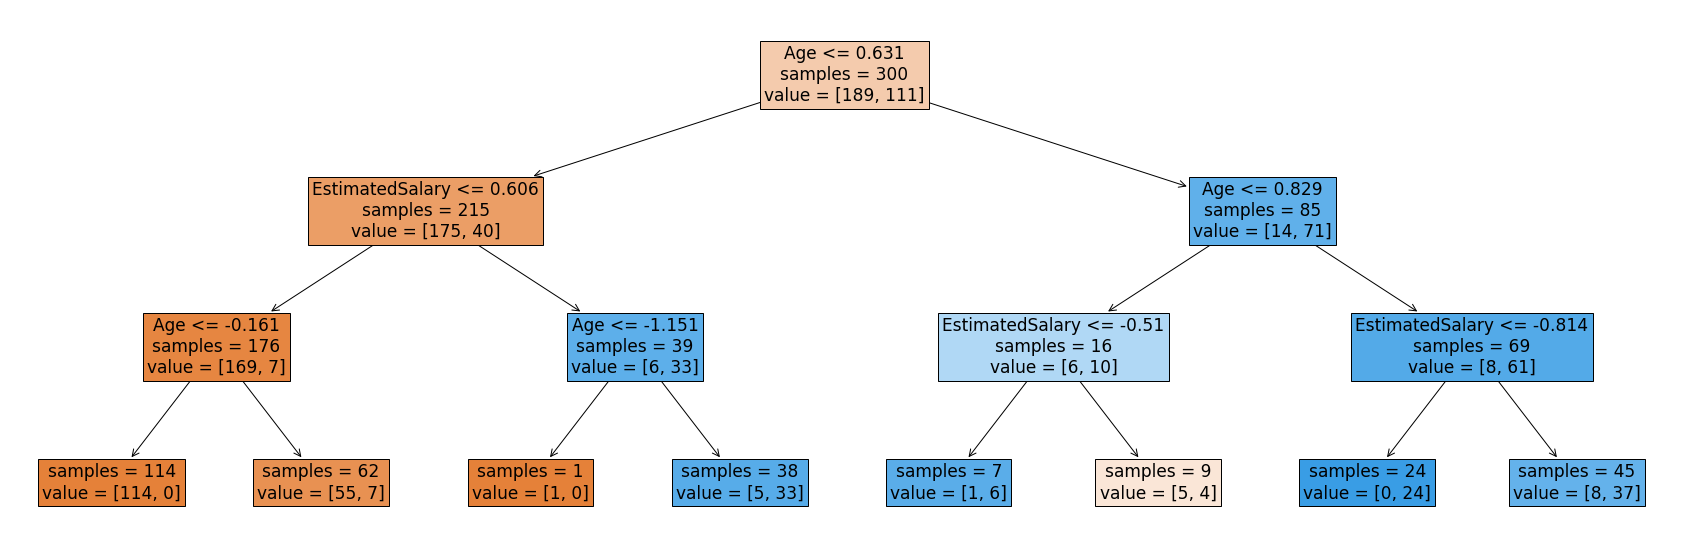

In [116]:
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names=['Age',"EstimatedSalary"],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()